In [1]:
import goesaws
import datetime
from datetime import datetime
import pandas as pd
import sys
from goes2go import GOES
import xarray as xr

In [2]:
GLM = GOES(satellite=16, product="GLM-L2-LCFA",domain='M')
glmdf = GLM.df(start='2022-07-04 01:00', end='2022-07-04 01:15')
glmdf['file'] = glmdf['file'].str.replace('noaa-goes16/', '')
glmdf.head()

domain argument is ignored for non-ABI products


,file,product_mode,satellite,start,end,creation
0,GLM-L2-LCFA/2022/185/01/OR_GLM-L2-LCFA_G16_s20...,GLM-L2-LCFA,G16,2022-07-04 01:00:00,2022-07-04 01:00:20,2022-07-04 01:00:22.400
1,GLM-L2-LCFA/2022/185/01/OR_GLM-L2-LCFA_G16_s20...,GLM-L2-LCFA,G16,2022-07-04 01:00:20,2022-07-04 01:00:40,2022-07-04 01:00:42.800
2,GLM-L2-LCFA/2022/185/01/OR_GLM-L2-LCFA_G16_s20...,GLM-L2-LCFA,G16,2022-07-04 01:00:40,2022-07-04 01:01:00,2022-07-04 01:01:02.400
3,GLM-L2-LCFA/2022/185/01/OR_GLM-L2-LCFA_G16_s20...,GLM-L2-LCFA,G16,2022-07-04 01:01:00,2022-07-04 01:01:20,2022-07-04 01:01:22.500
4,GLM-L2-LCFA/2022/185/01/OR_GLM-L2-LCFA_G16_s20...,GLM-L2-LCFA,G16,2022-07-04 01:01:20,2022-07-04 01:01:40,2022-07-04 01:01:42.300


In [10]:
# Make a dictionary of key-value pairs, where the key is the time of the file and the value is an array of its lat and lon coordinates

DS = [goesaws.gen_data(glmdf['file'][i]) for i in range(len(glmdf['file']))]

In [19]:
time_list = []
lat_list = []
lon_list = []
for ds in DS:
    time_list.append(ds['product_time'].values)
    lat_list.append(ds['flash_lat'].values)
    lon_list.append(ds['flash_lon'].values)

time_dict = dict(zip(time_list, zip(lat_list, lon_list)))


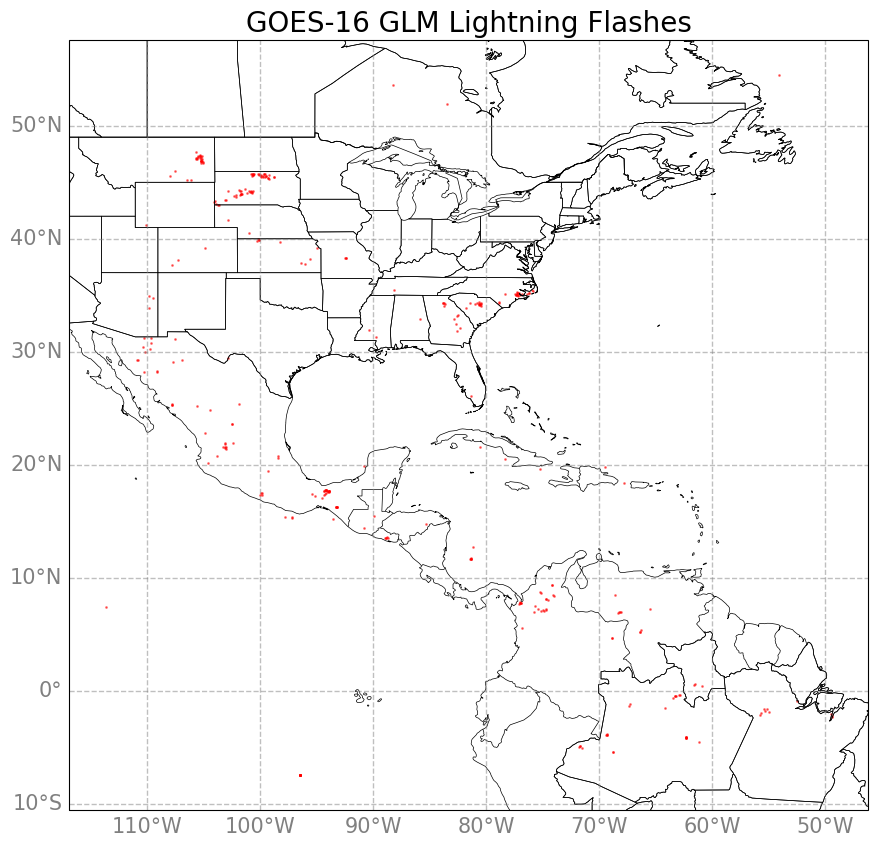

In [7]:
lat = DS['flash_lat']
lon = DS['flash_lon']

# Plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure
fig = plt.figure(figsize=(15, 10))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)

# Add country borders to plot
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

# Add coastlines to plot
ax.coastlines(resolution='50m', linewidth=0.5)

# Add lat/lon grid lines every 20° to the map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = True
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}

# Plot the data
plt.scatter(lon, lat, marker='o', color='red', s=1, alpha=0.5)

# Set the title
plt.title('GOES-16 GLM Lightning Flashes', size=20)

# Show the plot
plt.show()